## END TO END MACHINE LEARNING PROJECT
#### SPARK SESSION AND DATASET

In [243]:
sc.stop()

In [244]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_uygulama") \
    .config("spark.executer.memory", "16gb") \
    .getOrCreate()

sc = spark.sparkContext
sc

<SparkContext master=local appName=pyspark_uygulama>

In [245]:
file_path = "/Users/yunusbagriacik/Desktop/buyuk_veri/churn.csv"
spark_df = spark.read.csv(file_path, 
                          header = True, 
                          inferSchema = True,
                          sep = ",")

spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [246]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [247]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



24/07/21 15:01:39 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Names, Age, Total_Purchase, Account_Manager, Years, Num_Sites, Churn
 Schema: _c0, Names, Age, Total_Purchase, Account_Manager, Years, Num_Sites, Churn
Expected: _c0 but found: 
CSV file: file:///Users/yunusbagriacik/Desktop/buyuk_veri/churn.csv


In [248]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])
spark_df.show(3)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 3 rows



In [249]:
spark_df = spark_df.withColumnRenamed("_c0", "index")
spark_df.show(2)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 2 rows



In [250]:
spark_df.count()

900

In [251]:
len(spark_df.columns)

8

In [252]:
spark_df.columns 

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [253]:
from pyspark.sql.functions import col, sum

# Null değer sayısını hesaplamak için fonksiyonlar
spark_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in spark_df.columns]).show()

+-----+-----+---+--------------+---------------+-----+---------+-----+
|index|names|age|total_purchase|account_manager|years|num_sites|churn|
+-----+-----+---+--------------+---------------+-----+---------+-----+
|    0|    0|  0|             0|              0|    0|        0|    0|
+-----+-----+---+--------------+---------------+-----+---------+-----+



In [254]:
spark_df.distinct().count() # tüm satırlar(gözlemler) eşsiz mi?

900

In [255]:
spark_df.select("names").distinct().count() # names sütunundakiler eşsiz mi? Sonuçta iki tane aynı isimde
                                            #birisi var demek.

899

In [256]:
spark_df.groupby("names").count().sort("count", ascending = False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|    Patrick Bell|    1|
|Patrick Robinson|    1|
+----------------+-----+
only showing top 3 rows



In [257]:
spark_df.filter(spark_df.names == "Jennifer Wood").show() # bu kod bize satırın çoklanmadığını gösteriyor.
                                                          # spark_df.where(spark_df.names == "Jennifer Wood").show() ile aynı

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [258]:
spark_df.select("names").dropDuplicates().groupby("names").count().sort("count", ascending = False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
+----------------+-----+
only showing top 3 rows



In [259]:
spark_df.where(spark_df.index==439).select("names").show()

+-------------+
|        names|
+-------------+
|Jennifer Wood|
+-------------+



In [260]:
jen = spark_df.where(spark_df.index==439).collect()[0]["names"]
jen

'Jennifer Wood'

In [261]:
type(jen)

str

In [262]:
dir(jen)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'stri

In [263]:
jen.upper()

'JENNIFER WOOD'

### DESCRIPTIVE DATA ANALYSIS (KEŞİFÇİ VERİ ANALİZİ)

In [264]:
spark_df.describe().show(3)

+-------+------------------+-----+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-----+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|  900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5| NULL|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916| NULL|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
+-------+------------------+-----+-----------------+-----------------+------------------+-----------------+-----------

In [265]:
#describe'ı pandas kütüphanesinde de görebiliriz
spark_df.toPandas().describe().T 

,count,mean,std,min,25%,50%,75%,max
index,900.0,449.500000,259.951919,0.0,224.7500,449.500,674.250,899.00
age,900.0,41.816667,6.127560,22.0,38.0000,42.000,46.000,65.00
total_purchase,900.0,10062.824033,2408.644532,100.0,8497.1225,10045.870,11760.105,18026.01
account_manager,900.0,0.481111,0.499921,0.0,0.0000,0.000,1.000,1.00
years,900.0,5.273156,1.274449,1.0,4.4500,5.215,6.110,9.15
num_sites,900.0,8.587778,1.764836,3.0,7.0000,8.000,10.000,14.00
churn,900.0,0.166667,0.372885,0.0,0.0000,0.000,0.000,1.00


In [266]:
spark_df.filter(spark_df.age > 47).count()

161

In [267]:
spark_df.groupby("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [268]:
spark_df.groupby("churn").agg({"total_purchase":"mean"}).show()

# sonuç gösteriyor ki satın alma ile churn ilişkisi yok. 

+-----+-------------------+
|churn|avg(total_purchase)|
+-----+-------------------+
|    1| 10192.179933333337|
|    0| 10036.952853333332|
+-----+-------------------+



In [269]:
spark_df.groupby("churn").agg({"years":"mean"}).show()

+-----+------------------+
|churn|        avg(years)|
+-----+------------------+
|    1|5.8835999999999995|
|    0|5.1510666666666625|
+-----+------------------+



In [270]:
corr_data = spark_df.drop("index","names").toPandas()

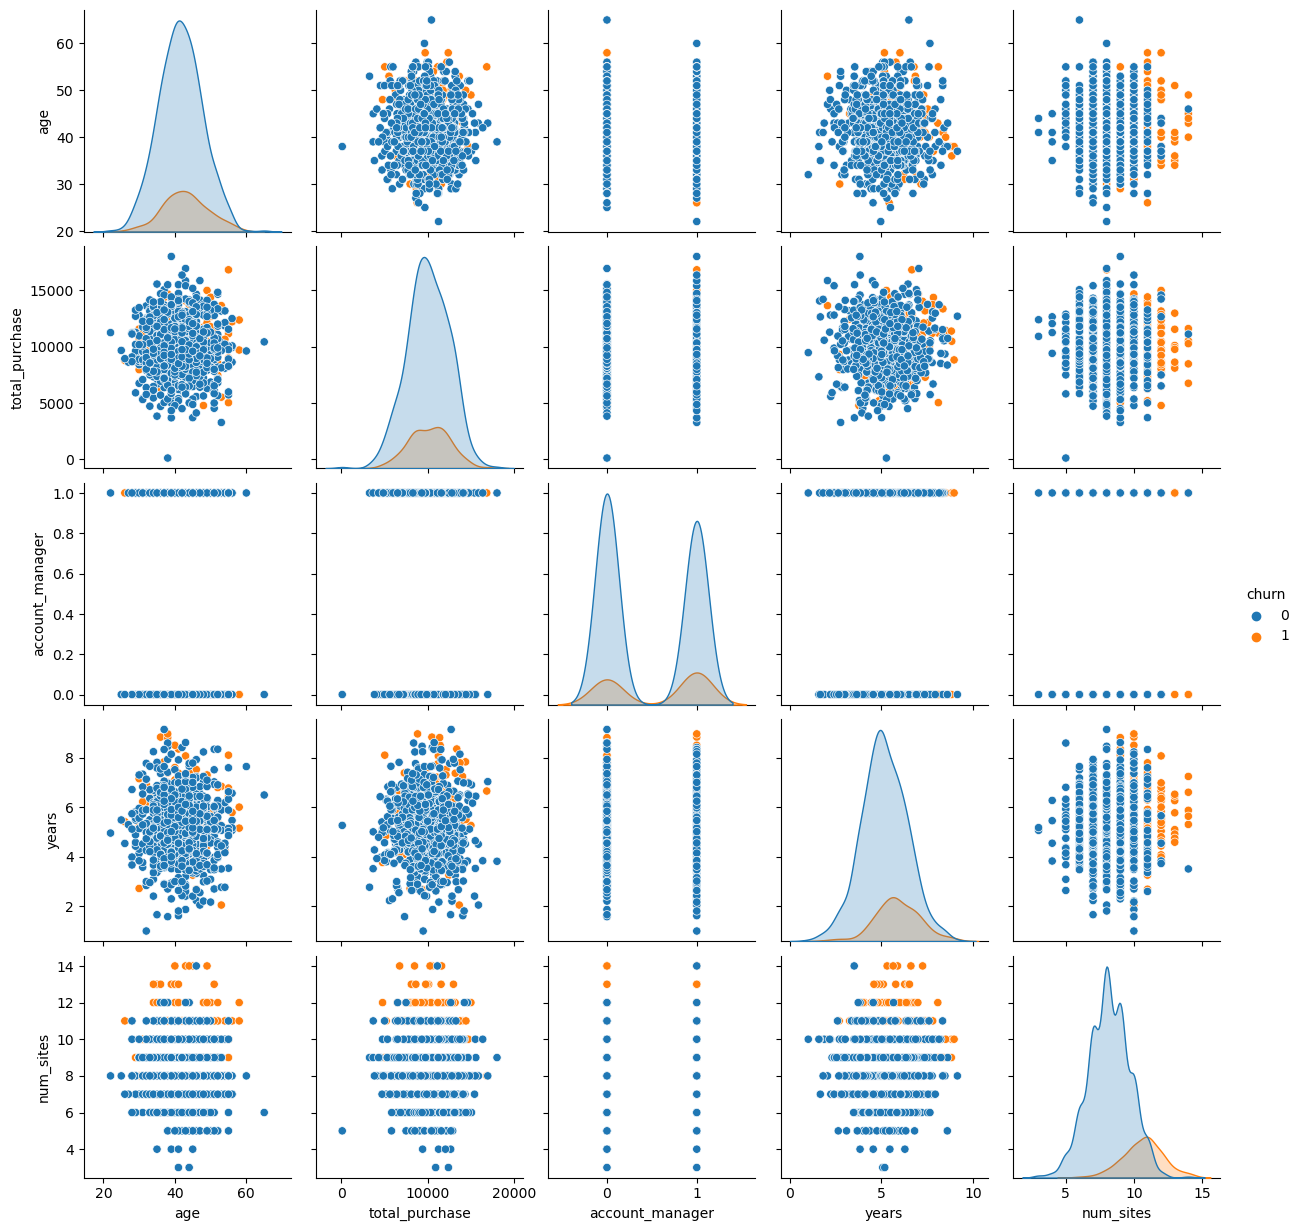

In [271]:
import seaborn as sns
sns.pairplot(corr_data, hue = "churn") # görsel çaprazlama

In [272]:
corr_data.corr()

,age,total_purchase,account_manager,years,num_sites,churn
age,1.000000,-0.037208,-0.014749,0.005625,-0.006070,0.085926
total_purchase,-0.037208,1.000000,0.015856,-0.005623,-0.003390,0.024031
account_manager,-0.014749,0.015856,1.000000,0.022930,0.033401,0.070611
years,0.005625,-0.005623,0.022930,1.000000,0.051642,0.214329
num_sites,-0.006070,-0.003390,0.033401,0.051642,1.000000,0.525398
churn,0.085926,0.024031,0.070611,0.214329,0.525398,1.000000


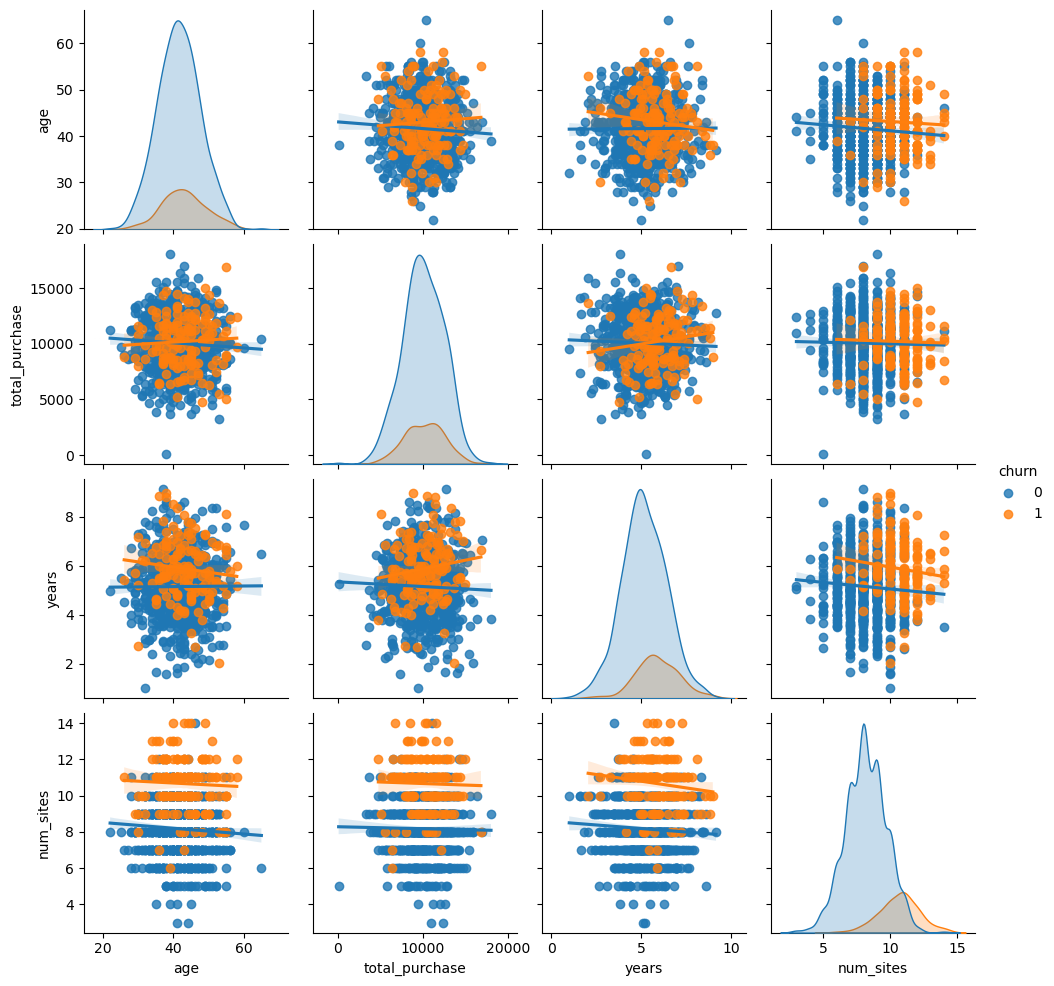

In [273]:
sns.pairplot(corr_data, vars = ["age", "total_purchase","years","num_sites"],
             hue = "churn",
             kind = "reg")# görsel çaprazlama

## DATA PREPROCESSING

In [274]:
spark_df = spark_df.dropna()
spark_df = spark_df.withColumn("age_kare",spark_df.age**2)
spark_df.show(10)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|
|    5|Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|  2304.0|
|    6|     Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|  1936.0|
|    7|   Zachary Walsh|32.0|       9885.12|              1| 6.92|      9.0|    

In [275]:
from pyspark.ml.feature import StringIndexer
stringIndexer = StringIndexer(inputCol="churn", outputCol="label")  # churn sütununu string'e dönüştürüp sonra integer'a dönüştürücez
                                                                    #gereksiz bi işlem gibi gözükebilir fakat önümüze hep böyle problem çıkacak.
                                                                    #bunun için sanki stringmiş gibi bakıcaz sonra int'e dönüştürücez.
?stringIndexer

Type:           StringIndexer
String form:    StringIndexer_7740d983b4a4
File:           /opt/anaconda3/lib/python3.11/site-packages/pyspark/ml/feature.py
Docstring:     
A label indexer that maps a string column of labels to an ML column of label indices.
If the input column is numeric, we cast it to string and index the string values.
The indices are in [0, numLabels). By default, this is ordered by label frequencies
so the most frequent label gets index 0. The ordering behavior is controlled by
setting :py:attr:`stringOrderType`. Its default value is 'frequencyDesc'.

.. versionadded:: 1.4.0

Examples
--------
>>> stringIndexer = StringIndexer(inputCol="label", outputCol="indexed",
...     stringOrderType="frequencyDesc")
>>> stringIndexer.setHandleInvalid("error")
StringIndexer...
>>> model = stringIndexer.fit(stringIndDf)
>>> model.setHandleInvalid("error")
StringIndexerModel...
>>> td = model.transform(stringIndDf)
>>> sorted(set([(i[0], i[1]) for i in td.select(td.id, td.indexed

In [281]:
indexed = stringIndexer.fit(spark_df).transform(spark_df)
indexed.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'double')]

In [282]:
spark_df = indexed.withColumn("label", indexed["label"].cast("integer"))
spark_df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'int')]

In [290]:
# Bagimsiz degiskenlerin ayarlanmasi
from pyspark.ml.feature import VectorAssembler
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_kare',
 'label']

In [296]:
bag = ["age","total_purchase","account_manager","years","num_sites"]
vectorAssembler = VectorAssembler(inputCols = bag, outputCol = "features")
va_df = vectorAssembler.transform(spark_df)
final_df = va_df.select(["features", "label"])
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



In [306]:
# test-train işlemleri
splits = final_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [307]:
train_df.count()

647

In [308]:
test_df.count()

253

In [310]:
train_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[22.0,11254.38,1....|    0|
|[25.0,9672.03,0.0...|    0|
|[26.0,8787.39,1.0...|    1|
|[27.0,8628.8,1.0,...|    0|
|[28.0,8670.98,0.0...|    0|
|[28.0,9090.43,1.0...|    0|
|[28.0,11128.95,1....|    0|
|[28.0,11245.38,0....|    0|
|[29.0,8688.17,1.0...|    1|
|[29.0,9378.24,0.0...|    0|
|[29.0,11274.46,1....|    0|
|[29.0,13255.05,1....|    0|
|[30.0,6744.87,0.0...|    0|
|[30.0,7960.64,1.0...|    1|
|[30.0,8677.28,1.0...|    0|
|[30.0,10183.98,1....|    0|
|[30.0,10960.52,1....|    0|
|[30.0,11575.37,1....|    1|
|[30.0,12788.37,0....|    0|
|[30.0,13473.35,0....|    0|
+--------------------+-----+
only showing top 20 rows



In [311]:
test_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[26.0,8939.61,0.0...|    0|
|[28.0,11204.23,0....|    0|
|[29.0,5900.78,1.0...|    0|
|[29.0,9617.59,0.0...|    0|
|[29.0,10203.18,1....|    0|
|[29.0,12711.15,0....|    0|
|[29.0,13240.01,1....|    0|
|[30.0,8403.78,1.0...|    0|
|[30.0,8874.83,0.0...|    0|
|[30.0,10744.14,1....|    1|
|[31.0,5304.6,0.0,...|    0|
|[31.0,8688.21,0.0...|    0|
|[31.0,10182.6,1.0...|    0|
|[32.0,8617.98,1.0...|    1|
|[32.0,11715.72,0....|    0|
|[32.0,12547.91,0....|    0|
|[33.0,4711.89,0.0...|    0|
|[33.0,5738.82,0.0...|    0|
|[33.0,10709.39,1....|    0|
|[33.0,12249.96,0....|    0|
+--------------------+-----+
only showing top 20 rows



## GRADIENT BOOSTING MODEL

In [317]:
from pyspark.ml.classification import GBTClassifier
gbm = GBTClassifier(maxIter=10, featuresCol = "features", labelCol="label")
gbm_model = gbm.fit(train_df)

In [318]:
y_pred = gbm_model.transform(test_df)
y_pred

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [328]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder().
             addGrid(gbm.maxDepth, [2,4,6]).
             addGrid(gbm.maxBins, [20,30]).
             addGrid(gbm.maxIter, [10,20]).
             build())
            
cv = CrossValidator(estimator = gbm, estimatorParamMaps = paramGrid, evaluator=evaluator, numFolds=10)

In [330]:
cv_model = cv.fit(train_df)

In [334]:
y_pred = cv_model.transform(test_df)
ac = y_pred.select("label", "prediction")

In [335]:
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.9130434782608695

In [336]:
evaluator.evaluate(y_pred) # roc değeri

0.9256425948592412

### Random Yeni Müşteri Oluşturup Test Etme

In [351]:
import pandas as pd
import random

# Sütun isimleri
columns = ["names", "age", "total_purchase", "account_manager", "years", "num_sites"]

# Boş bir pandas DataFrame oluşturma
data = []
num_rows = 10  # Örnek olarak 10 satır ekleyelim
for _ in range(num_rows):
    row = {
        "names": f"Name_{_}",
        "age": random.randint(18, 70),
        "total_purchase": random.randint(1000,100000),
        "account_manager": random.randint(0, 1),
        "years": random.randint(1, 30),
        "num_sites": random.randint(1, 20)
    }
    data.append(row)

yeni_musteriler = pd.DataFrame(data, columns=columns)

# Pandas DataFrame'i Spark DataFrame'e dönüştürme
yeni_sdf = spark.createDataFrame(yeni_musteriler)

# Spark DataFrame'i göster
yeni_sdf.show()

+------+---+--------------+---------------+-----+---------+
| names|age|total_purchase|account_manager|years|num_sites|
+------+---+--------------+---------------+-----+---------+
|Name_0| 42|          8397|              1|    4|       18|
|Name_1| 55|         72820|              1|    3|        6|
|Name_2| 69|         44352|              0|   13|        6|
|Name_3| 40|         26164|              0|   21|       12|
|Name_4| 46|         36166|              0|   11|       11|
|Name_5| 50|         16229|              0|   16|       11|
|Name_6| 49|         51696|              1|   22|       17|
|Name_7| 51|         46492|              1|   19|       11|
|Name_8| 43|         66255|              0|    6|        1|
|Name_9| 26|         86680|              1|   19|       10|
+------+---+--------------+---------------+-----+---------+



In [343]:
type(yeni_sdf)

pyspark.sql.dataframe.DataFrame

In [352]:
yeni_musteriler = vectorAssembler.transform(yeni_sdf) # klasik ml'de predict işlemi yapar
sonuclar = cv_model.transform(yeni_musteriler)
sonuclar.select("names","prediction").show()

+------+----------+
| names|prediction|
+------+----------+
|Name_0|       1.0|
|Name_1|       0.0|
|Name_2|       0.0|
|Name_3|       1.0|
|Name_4|       1.0|
|Name_5|       1.0|
|Name_6|       1.0|
|Name_7|       1.0|
|Name_8|       0.0|
|Name_9|       1.0|
+------+----------+

